# MLP in Tensorflow with Best Hyperparameters

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.math import argmax
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import wandb
from wandb.keras import WandbCallback
from matplotlib import pyplot as plt
from pprint import pprint

## Login to Wandb

In [2]:
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Load best hyperparameters

In [3]:
api = wandb.Api()
sweep = api.sweep("nsiete23/tf_mlp/sweeps/3ca45van")

best_config = sweep.best_run().config
pprint(best_config)

wandb: Sorting runs by +summary_metrics.val_loss


{'batch_size': 64,
 'dense_1': 456,
 'dense_2': 150,
 'dense_3': 132,
 'dense_4': 68,
 'epochs': 21,
 'learning_rate': 0.023615358865991583,
 'momentum': 0.06432719692244611}


## Define training functions

In [4]:
def create_model(config):
    model = Sequential([
        Rescaling(scale=1./255, input_shape=(28, 28)),
        Flatten(),
        
        Dense(config.dense_1, activation='relu'),
        Dense(config.dense_2, activation='relu'),
        Dense(config.dense_3, activation='relu'),
        Dense(config.dense_4, activation='relu'),

        Dense(10, activation='softmax'),
    ])

    return model

In [5]:
def compile_model(model, config):
    model.compile(
        optimizer=SGD(learning_rate=config.learning_rate, momentum=config.momentum),
        loss=SparseCategoricalCrossentropy(),
        metrics=[SparseCategoricalAccuracy()]
    )

In [6]:
def train_model(model, config, x_train, y_train):
    history = model.fit(
        x_train,
        y_train,
        epochs=config.epochs,
        validation_split=0.2,
        batch_size=config.batch_size,
        shuffle=True,
        callbacks=[
            WandbCallback()
        ]
    )

    return history

## Load dataset and train

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
wandb.init(config=best_config, project='tf_mlp', name='best-mlp-tf')

config = wandb.config

mlp = create_model(config)
mlp.summary()
compile_model(mlp, config)
history = train_model(mlp, config, x_train, y_train)

wandb.finish()

4422102/4422102 [==============================] - 0s 0us/step


wandb: Currently logged in as: v-modroczky (nsiete23). Use `wandb login --relogin` to force relogin


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 456)               357960    
                                                                 
 dense_1 (Dense)             (None, 150)               68550     
                                                                 
 dense_2 (Dense)             (None, 132)               19932     
                                                                 
 dense_3 (Dense)             (None, 68)                9044      
                                                                 
 dense_4 (Dense)             (None, 10)                6

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/21
745/750 [============================>.] - ETA: 0s - loss: 0.7668 - sparse_categorical_accuracy: 0.7376

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 6s 5ms/step - loss: 0.7656 - sparse_categorical_accuracy: 0.7380 - val_loss: 0.5720 - val_sparse_categorical_accuracy: 0.7869
Epoch 2/21
750/750 [==============================] - ETA: 0s - loss: 0.4734 - sparse_categorical_accuracy: 0.8316

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 6ms/step - loss: 0.4734 - sparse_categorical_accuracy: 0.8316 - val_loss: 0.4560 - val_sparse_categorical_accuracy: 0.8345
Epoch 3/21
743/750 [============================>.] - ETA: 0s - loss: 0.4155 - sparse_categorical_accuracy: 0.8499

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 5ms/step - loss: 0.4155 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.4052 - val_sparse_categorical_accuracy: 0.8511
Epoch 4/21
747/750 [============================>.] - ETA: 0s - loss: 0.3829 - sparse_categorical_accuracy: 0.8614

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 6ms/step - loss: 0.3827 - sparse_categorical_accuracy: 0.8614 - val_loss: 0.3814 - val_sparse_categorical_accuracy: 0.8645
Epoch 5/21
735/750 [============================>.] - ETA: 0s - loss: 0.3586 - sparse_categorical_accuracy: 0.8702

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 5ms/step - loss: 0.3578 - sparse_categorical_accuracy: 0.8705 - val_loss: 0.3589 - val_sparse_categorical_accuracy: 0.8702
Epoch 6/21
750/750 [==============================] - 3s 3ms/step - loss: 0.3407 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.3836 - val_sparse_categorical_accuracy: 0.8579
Epoch 7/21
748/750 [============================>.] - ETA: 0s - loss: 0.3248 - sparse_categorical_accuracy: 0.8824

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 5ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.3537 - val_sparse_categorical_accuracy: 0.8724
Epoch 8/21
750/750 [==============================] - ETA: 0s - loss: 0.3143 - sparse_categorical_accuracy: 0.8855

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 6ms/step - loss: 0.3143 - sparse_categorical_accuracy: 0.8855 - val_loss: 0.3418 - val_sparse_categorical_accuracy: 0.8797
Epoch 9/21
737/750 [============================>.] - ETA: 0s - loss: 0.2995 - sparse_categorical_accuracy: 0.8899

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 5ms/step - loss: 0.2991 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.3313 - val_sparse_categorical_accuracy: 0.8790
Epoch 10/21
750/750 [==============================] - 3s 3ms/step - loss: 0.2870 - sparse_categorical_accuracy: 0.8954 - val_loss: 0.3333 - val_sparse_categorical_accuracy: 0.8799
Epoch 11/21
750/750 [==============================] - 3s 4ms/step - loss: 0.2785 - sparse_categorical_accuracy: 0.8972 - val_loss: 0.3653 - val_sparse_categorical_accuracy: 0.8650
Epoch 12/21
750/750 [==============================] - 2s 3ms/step - loss: 0.2700 - sparse_categorical_accuracy: 0.9006 - val_loss: 0.3427 - val_sparse_categorical_accuracy: 0.8766
Epoch 13/21
734/750 [============================>.] - ETA: 0s - loss: 0.2616 - sparse_categorical_accuracy: 0.9032

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 5ms/step - loss: 0.2613 - sparse_categorical_accuracy: 0.9034 - val_loss: 0.3288 - val_sparse_categorical_accuracy: 0.8828
Epoch 14/21
747/750 [============================>.] - ETA: 0s - loss: 0.2527 - sparse_categorical_accuracy: 0.9070

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 5s 6ms/step - loss: 0.2527 - sparse_categorical_accuracy: 0.9070 - val_loss: 0.3165 - val_sparse_categorical_accuracy: 0.8867
Epoch 15/21
748/750 [============================>.] - ETA: 0s - loss: 0.2452 - sparse_categorical_accuracy: 0.9096

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 6ms/step - loss: 0.2452 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.3149 - val_sparse_categorical_accuracy: 0.8862
Epoch 16/21
732/750 [============================>.] - ETA: 0s - loss: 0.2389 - sparse_categorical_accuracy: 0.9119

wandb: Adding directory to artifact (/kaggle/working/wandb/run-20230301_112027-hpfyaknz/files/model-best)... Done. 0.1s


750/750 [==============================] - 4s 5ms/step - loss: 0.2395 - sparse_categorical_accuracy: 0.9115 - val_loss: 0.3041 - val_sparse_categorical_accuracy: 0.8904
Epoch 17/21
750/750 [==============================] - 2s 3ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9153 - val_loss: 0.3354 - val_sparse_categorical_accuracy: 0.8825
Epoch 18/21
750/750 [==============================] - 3s 3ms/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9163 - val_loss: 0.3185 - val_sparse_categorical_accuracy: 0.8882
Epoch 19/21
750/750 [==============================] - 3s 3ms/step - loss: 0.2163 - sparse_categorical_accuracy: 0.9201 - val_loss: 0.3225 - val_sparse_categorical_accuracy: 0.8865
Epoch 20/21
750/750 [==============================] - 3s 3ms/step - loss: 0.2108 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.3480 - val_sparse_categorical_accuracy: 0.8817
Epoch 21/21
750/750 [==============================] - 2s 3ms/step - loss: 0.2050 - sparse_categorical_accu

epoch,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
sparse_categorical_accuracy,▁▅▅▆▆▆▆▇▇▇▇▇▇▇▇██████
val_loss,█▅▄▃▂▃▂▂▂▂▃▂▂▁▁▁▂▁▁▂▁
val_sparse_categorical_accuracy,▁▄▅▆▇▆▇▇▇▇▆▇▇███▇██▇█
best_epoch,15
best_val_loss,0.30413
epoch,20
loss,0.20505
sparse_categorical_accuracy,0.92429
val_loss,0.31742


## Plot training and validation accuracy and loss

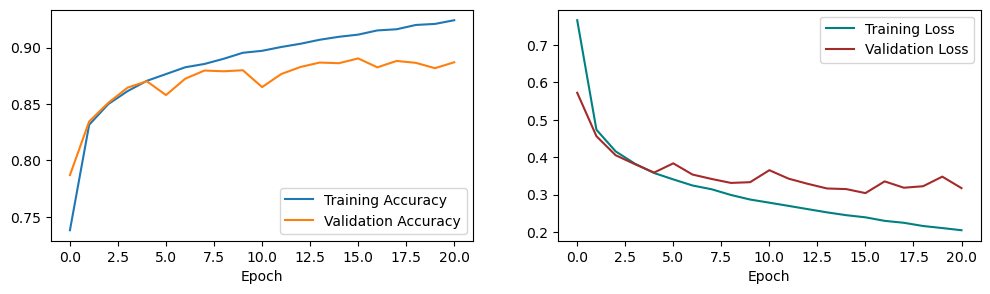

In [8]:
plt.subplots(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='teal')
plt.plot(history.history['val_loss'], label='Validation Loss', color='brown')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Define class names

In [9]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Run classification evaluation

In [12]:
y_pred = argmax(mlp.predict(x_test), axis = 1)
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top     0.8683    0.7780    0.8207      1000
     Trouser     0.9877    0.9630    0.9752      1000
    Pullover     0.7877    0.8090    0.7982      1000
       Dress     0.9118    0.8580    0.8841      1000
        Coat     0.8261    0.7790    0.8019      1000
      Sandal     0.9359    0.9780    0.9565      1000
       Shirt     0.6464    0.7750    0.7049      1000
     Sneaker     0.9564    0.9210    0.9384      1000
         Bag     0.9604    0.9700    0.9652      1000
  Ankle boot     0.9550    0.9560    0.9555      1000

    accuracy                         0.8787     10000
   macro avg     0.8836    0.8787    0.8800     10000
weighted avg     0.8836    0.8787    0.8800     10000



## Visualize confusion matrix

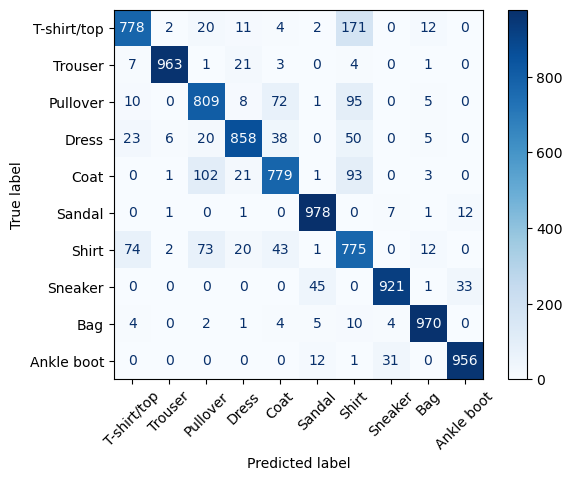

In [13]:
matrix = confusion_matrix(y_test, y_pred)
matrix_display = ConfusionMatrixDisplay(matrix, display_labels=class_names)
matrix_display.plot(cmap=plt.cm.Blues, xticks_rotation=45)